# Histogram of dates

In [23]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.io.votable as vo
%matplotlib notebook

## Load data

First we load a table of some astronomical observtions. The format is *VOTable* but it can be any dataset you have

In [24]:
vt = vo.parse('rows_as_votable_1553111098_9423.vot').get_first_table()

Many times we only want a subset of the total, for a quick inspection

In [25]:
vt_sub = vt.to_table()[['start_date','exposure', 'ra', 'dec']]

Transforming into a pandas dataframe

In [26]:
df = vt_sub.to_pandas()
df.tail()

,start_date,exposure,ra,dec
3020,b'2019-02-10',40.0,209.959696,-15.038861
3021,b'2019-02-10',40.0,210.021375,-15.019111
3022,b'2019-02-10',40.0,210.038821,-15.040277
3023,b'2019-02-10',40.0,209.982658,-14.998444
3024,b'2019-02-10',40.0,210.024450,-15.087861


We need to convert dates to the **datetime** format. 

**Note:** in some cases, converting to datetime can fail, because of the fail in decode data as string. This is solved using `str.decode('utf-8')`

In [27]:
df['start_date'] = pd.to_datetime(df['start_date'].str.decode('utf-8'))
df.tail()

,start_date,exposure,ra,dec
3020,2019-02-10,40.0,209.959696,-15.038861
3021,2019-02-10,40.0,210.021375,-15.019111
3022,2019-02-10,40.0,210.038821,-15.040277
3023,2019-02-10,40.0,209.982658,-14.998444
3024,2019-02-10,40.0,210.024450,-15.087861


## Plotting

<IPython.core.display.Javascript object>


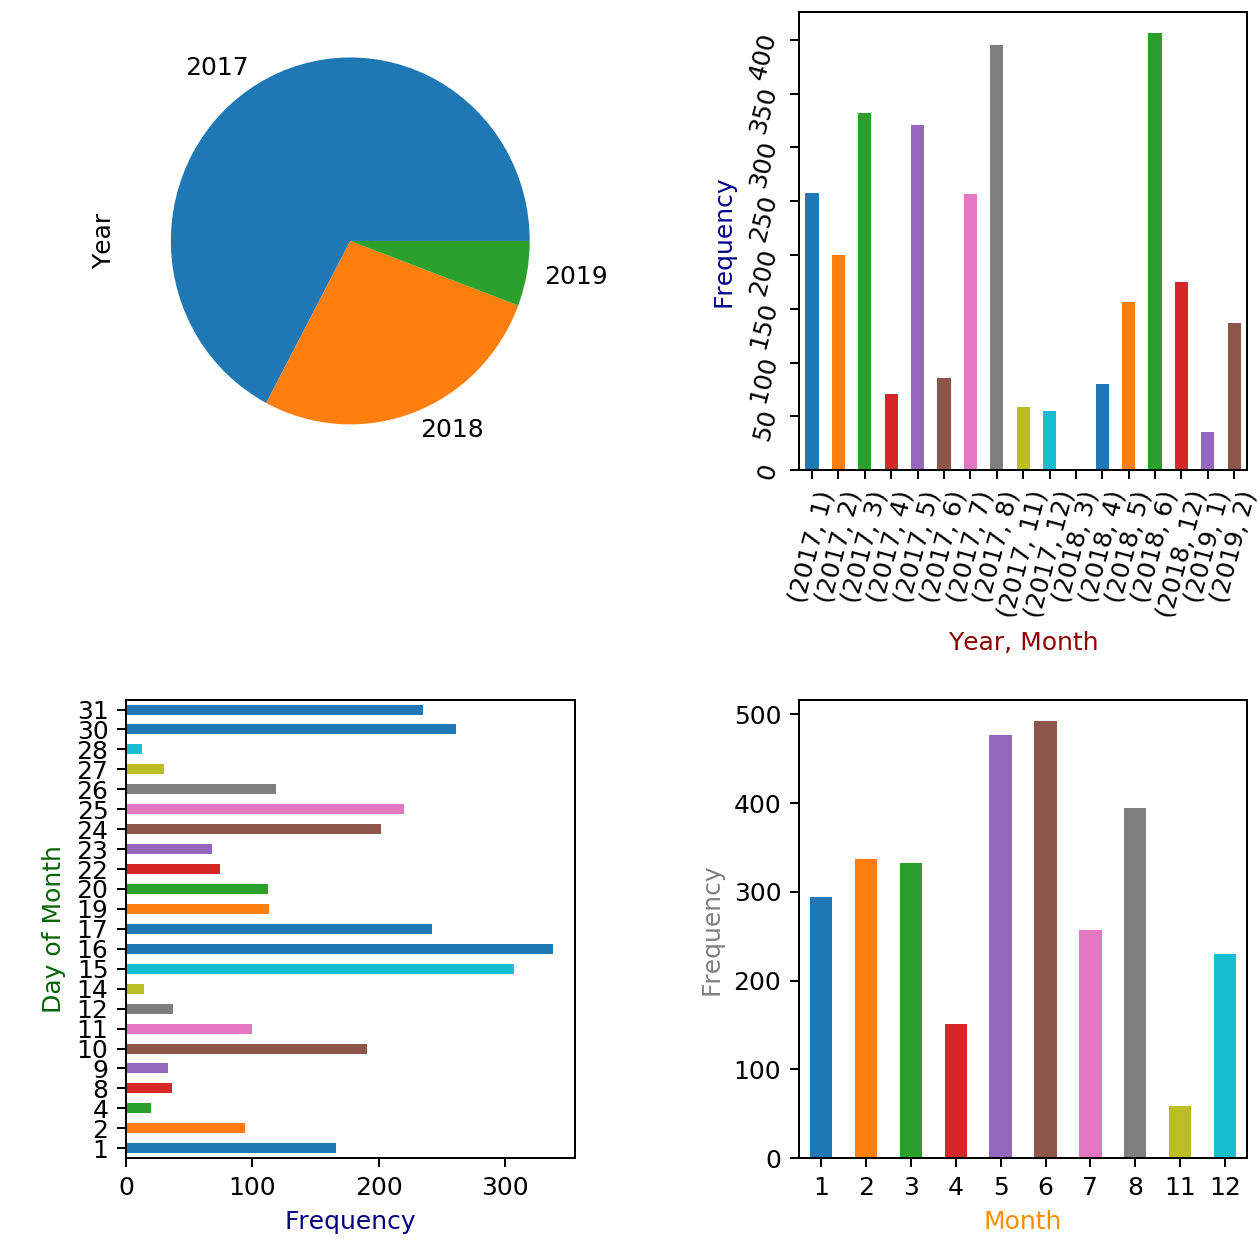

In [69]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
# To activate the subplots, we use plt.sca()

# 1) By year. Pie chart
plt.sca(ax[0, 0])
df['start_date'].groupby(df['start_date'].dt.year).count().plot(kind='pie')
ax[0, 0].set_ylabel('Year')

# 2) By month.
plt.sca(ax[0, 1])
df['start_date'].groupby([df['start_date'].dt.year, df['start_date'].dt.month]).count().plot(kind='bar')
ax[0, 1].tick_params(labelrotation=75)
ax[0, 1].set_xlabel('Year, Month', color='darkred')
ax[0, 1].set_ylabel('Frequency', color='darkblue')

# 3) By day of the month
plt.sca(ax[1, 0])
df['start_date'].groupby(df['start_date'].dt.day).count().plot(kind='barh')
ax[1, 0].set_xlabel('Frequency', color='navy')
ax[1, 0].set_ylabel('Day of Month', color='darkgreen')

# 3) By month
plt.sca(ax[1, 1])
df['start_date'].groupby(df['start_date'].dt.month).count().plot(kind='bar')
ax[1, 1].tick_params(labelrotation=0)
ax[1, 1].set_xlabel('Month', color='darkorange')
ax[1, 1].set_ylabel('Frequency', color='gray')

plt.subplots_adjust(hspace=0.5, wspace=0.5, left=0.1, bottom=0.08, top=0.99, right=0.99)

plt.savefig('histogram_dates.png', dpi=300, format='png')